In [2]:
#import numpy to work with arrays
import numpy as np

#import matplotlib.pylot to manipulate the arrary
    #matplotlib is a plotting library for creating static, animated, and interactive visualizations
    #pyplot allows the use of function makes some changes to a plot, with the available plot types as:
        #Line Plot, Histogram, Scatter, 3D Plot, Image, Contour, and Polar
import matplotlib.pyplot as plot

In [3]:
#load image, saved as an array
    #details on how to convert imgages to arrays:
    #https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
my_array = np.load('an_array.npy')

In [4]:
#check the class for an array, numpy compatiblity
type(my_array)


#Note: ndarray is an n-dimensional array of items of the same type and size
    # shape - a tuple which defines n(# of dimensions) and items in an ndarray

numpy.ndarray

In [69]:
#check the dimensions of the array
my_array.ndim

3

In [70]:
#check the shape of the array
my_array.shape

#the dimensions are 599 x 402 w/ 3 items each

(599, 402, 3)

In [71]:
#inspect the data type
my_array.dtype


# uint8 - an unsigned 8-bit integer (∴ possible values: 0-255)

dtype('uint8')

In [72]:
#inspect the size of the array
my_array.size, 599*402*3

# size function - counts of the number of elements along an axis

(722394, 722394)

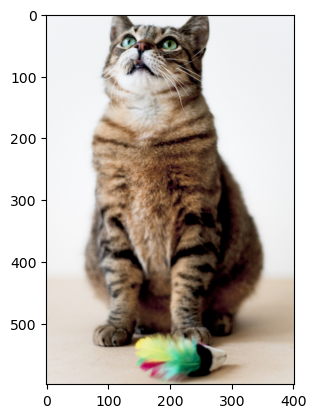

In [73]:
#displays the data
plot.imshow(my_array)

In [74]:
#checking the value at a specific index
my_array[100,200,0]

194

In [75]:
#use fewer indicies to generate lower dimensional sub array
    #starts from leftmost dimension
my_array[10,0]

array([243, 244, 246], dtype=uint8)

In [76]:
#setting a new value at that index
my_array[100,200,0] = 255

#confirming the value has updated
my_array[100,200,0]

255

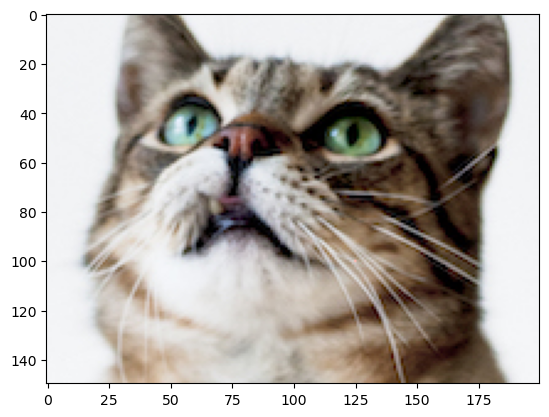

In [77]:
#generate a subarray
sub_array = my_array[0:150, 75:275]


#functions as cropping the image
plot.imshow(sub_array)

In [78]:
#inspecting the shape of the subarray
sub_array.shape

(150, 200, 3)

In [79]:
import sys
sub_array.shape
# Setting the print options to display the entire array without truncation
# Use sys.maxsize or np.inf for untruncated representation
np.set_printoptions(threshold=sys.maxsize)
print(sub_array)

[[[243 244 246]
  [242 243 245]
  [242 243 245]
  [243 244 246]
  [244 245 247]
  [242 243 245]
  [242 243 245]
  [242 243 245]
  [242 243 245]
  [242 243 245]
  [242 243 245]
  [242 243 245]
  [243 244 246]
  [243 244 246]
  [242 243 245]
  [244 245 247]
  [243 244 246]
  [243 244 246]
  [242 243 245]
  [242 243 245]
  [242 243 245]
  [242 243 245]
  [242 243 245]
  [241 242 244]
  [243 244 246]
  [242 243 245]
  [242 243 245]
  [241 242 244]
  [241 242 244]
  [242 243 245]
  [241 242 246]
  [235 238 243]
  [229 233 234]
  [214 218 217]
  [188 187 185]
  [181 180 176]
  [175 176 168]
  [166 162 151]
  [153 146 138]
  [138 129 124]
  [132 123 116]
  [129 119 110]
  [120 107  98]
  [105  91  82]
  [113 100  92]
  [122 107 100]
  [118 103  96]
  [103  90  82]
  [ 83  74  65]
  [ 77  70  60]
  [ 84  76  63]
  [102  89  73]
  [120 101  84]
  [162 149 130]
  [209 208 203]
  [231 233 232]
  [240 238 243]
  [238 242 243]
  [244 243 248]
  [243 244 248]
  [243 244 248]
  [243 244 246]
  [242 2

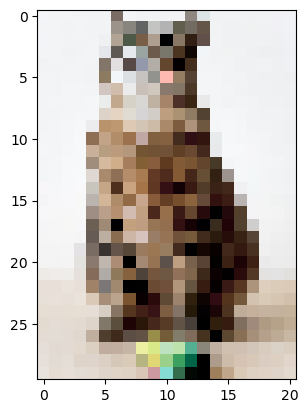

In [121]:
#Use slicing in steps - utilize the 20th element in the horizontal and vertical dimensions
    #downscaling - image resolution reduction
downscaled = my_array[0:599:20, 0:402:20, :]
plot.imshow(downscaled)

In [122]:
#to demonstrate the downscaling was effective mathmatically, utlize the strides function, which take sub samples
    #strides function calculates the steps needed to jump between sucessive bytes in each direction
my_array.strides

(1206, 3, 1)

In [123]:
#per the slicing at every 20th element, strides between sucessive bytes of the downscaled image are 20x as far
downscaled.strides

(24120, 60, 1)

In [128]:
#another confirmation the slicing was effective is to review the shape
    #note the original shape from line 70 was (599, 402, 3)
downscaled.shape

#while the elements remain pointing to the original memory,
#the slicing has created new subararrays denoted in the shape

(30, 21, 3)

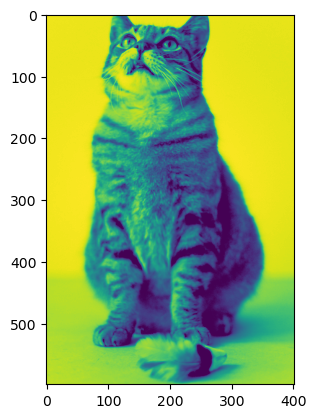

In [124]:
#use numpy function mean to compute averages of RGB values along the 3rd dimension of the array
    #the mathmatical mean functions used to genearate values which produce grayscale images
    #Note: in this syntax the axis is 2 (for the 3rd dimension) since axes counts from zero (0,1,2)
grayscale = np.mean(my_array, axis = 2)
plot.imshow(grayscale)
#first we print the literal average colors using the standard red, green, blue colormap

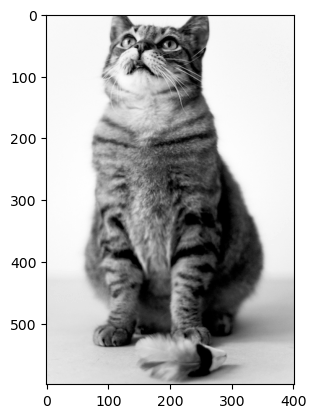

In [125]:
#then we use a colormap that is gray(white through black) using these same average values
plot.imshow(grayscale, cmap = 'gray')

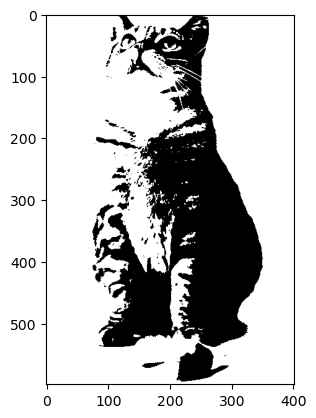

In [133]:
#Another way to process this array is using boolean functions
    #polarizing the values into black, 0, and white, 255, creates a black and white image

#first set all the averaged RGB values less than zero to 0 (black)
grayscale[grayscale < 110] = 0
#since these steps are excecuted in order, next set all the reamaining non zero values to 255 (white)
grayscale[grayscale >0] = 255
#plot the array conisting only of 0s and 255s
plot.imshow(grayscale, cmap = 'gray')

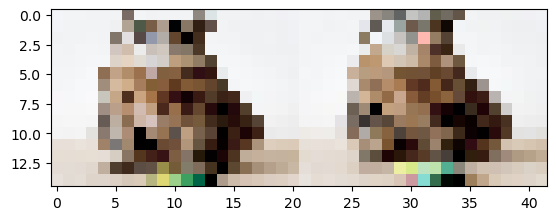

In [135]:
#Another function that can be used is reshape
    #Using the current shape (30, 21, 3)
        #merge every first and second row into one that is twice as long
        #this turns the image from 'portrait' to 'landscape'
        # and generates 2 cats with subarrays twice as wide as they are high
        #note the reshape function does not create/destroy space and only ceratain resizing can be performed
reshaped = downscaled.reshape(30//2, 21*2, 3)
plot.imshow(reshaped)